# This Notebook uses auto mpg Dataset to predict the mileage of cars

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing and displaying the required data

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\ML\DataSets\auto-mpg.csv') 
print(df.head())
print(df.index)
print(df.columns)

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
RangeIndex(start=0, stop=398, step=1)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
df = df[df.horsepower != '?']

In [6]:
df.shape

(392, 9)

In [7]:
df.horsepower = df.horsepower.astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
df.describe()['mpg']

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Skewness: 0.45709232306041025
Kurtosis: -0.5159934946351457


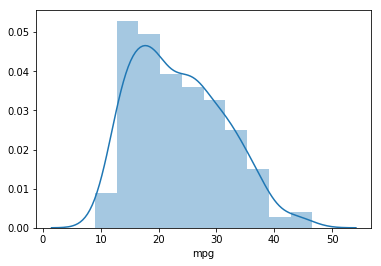

In [28]:
sns.distplot(df['mpg'], bins = 10, kde = True)
print("Skewness: " + str(df['mpg'].skew()))
print("Kurtosis: " + str(df['mpg'].kurt()))

In [47]:
corr_mat = df.corr()
corr_mat['mpg']

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model year      0.580541
origin          0.565209
Name: mpg, dtype: float64

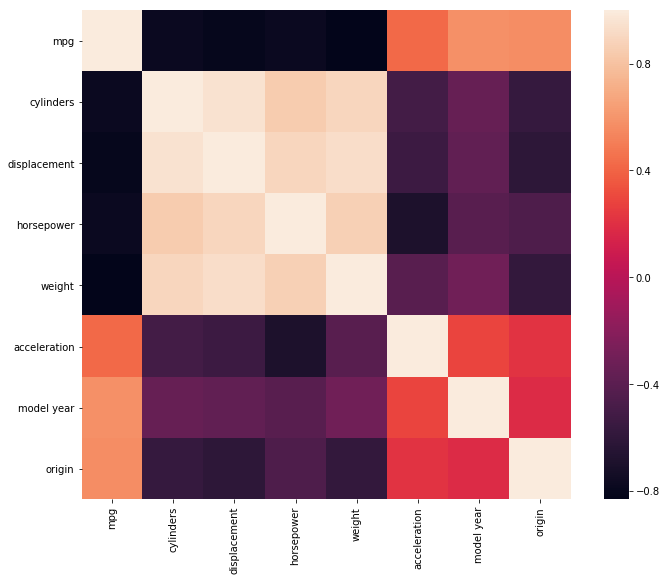

In [41]:
plt.figure(figsize=(12,9))
sns.heatmap(corr_mat, square = True)

In [48]:
data = df.copy()
data['country code'] = data.origin.replace([1,2,3] , ['USA', 'Europe', 'Japan'])

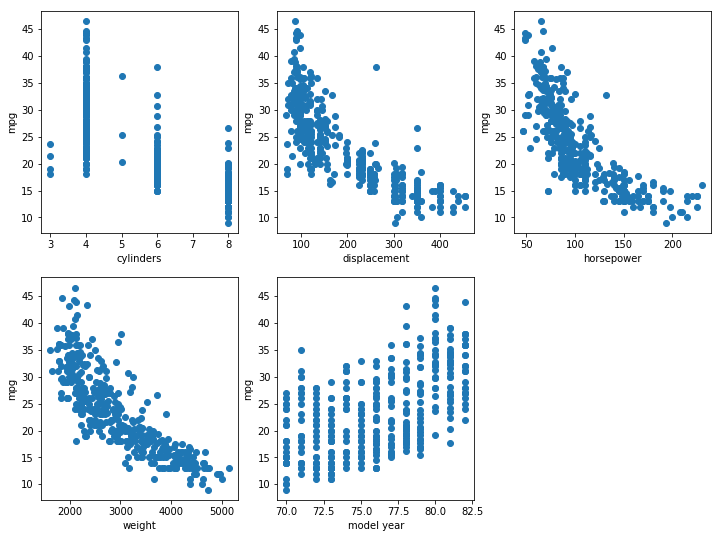

In [80]:
plt.figure(figsize=(12,9))
# plt.subplot((1,4))

factors = ['cylinders', 'displacement', 'horsepower', 'weight', 'model year']

for i in range(0,len(factors)):
    
    col = factors[i]
    x = np.array(df[col])
    y = np.array(df['mpg'])
    
    plt.subplot(2,3,i+1)
    plt.scatter(x,y)
    plt.xlabel(col)
    plt.ylabel('mpg')

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
X = np.array(df[['displacement','horsepower','weight', 'cylinders', 'model year']])
Y = np.array(df['mpg'])
X = normalize(X,axis = 1,norm = 'l2')

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2, random_state = 5)

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
from sklearn.metrics import r2_score
Y_test_predict = model.predict(X_test)
Y_train_predict = model.predict(X_train)
error_test = r2_score(Y_test,Y_test_predict)
error_train = r2_score(Y_train,Y_train_predict)
print('Training Accuracy: ' + str(error_train*100))
print('Test Accuracy: ' + str(error_test*100))

Training Accuracy: 82.63395010957254
Test Accuracy: 79.35088213007828


In [82]:
df1 = pd.DataFrame(Y_test)
df1['Predicted Value'] = pd.DataFrame(Y_test_predict)
df1.columns = ['Real Value', 'Predicted Value']
df1

,Real Value,Predicted Value
0,13.0,15.697871
1,25.0,25.437934
2,34.5,31.523949
3,37.3,31.514425
4,17.5,15.735543
5,28.1,23.651325
6,24.3,24.232032
7,34.0,28.952985
8,14.0,13.997696
9,18.0,20.457529
